#  Porto Seguro’s Safe Driver Prediction

### 1. Overview 

**1) Description**

> Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years. 
>
>Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.
>
>In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

**2) Evaluation**
> Scoring Metric : Normalized Gini Coefficient


### 2. Data 
> In this competition, you will predict the probability that an auto insurance policy holder files a claim.
>
> In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## 0. Data Loading [Train/Test]

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '../dataset/'
train_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path+ 'test.csv')

print("[TRAIN] : {}".format(train_df.shape))
print("[TEST]  : {}".format(test_df.shape))

[TRAIN] : (595212, 59)
[TEST]  : (892816, 58)


## 1. Data Information 

####  1) Column 정보

In [3]:
train_df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


#### 2) Data format 

In [4]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


#### 3) Data 요약 정보/통계

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


#### 4) Data Feauture 분류

- Feature Name 
  - ps_ind
  - ps_reg
  - ps_car
  - ps_calc


- Data Type
  - categorical value 
  - binary vlaue
  - continuous value 

In [8]:
ind_list = [[],[],[]]
reg_list = [[],[],[]]
car_list = [[],[],[]]
calc_list = [[],[],[]]

for col in train_df.columns:
    if 'ind' in col:
        ind_list[0].append(col)
        if 'cat' in col:
            ind_list[1].append(col)
        elif 'bin' in col:
            ind_list[2].append(col)
    elif 'reg' in col:
        reg_list[0].append(col)
        if 'cat' in col:
            reg_list[1].append(col)
        elif 'bin' in col:
            reg_list[2].append(col)
    elif 'car' in col:
        car_list[0].append(col)
        if 'cat' in col:
            car_list[1].append(col)
        elif 'bin' in col:
            car_list[2].append(col)
    elif 'calc' in col:
        calc_list[0].append(col)
        if 'cat' in col:
            calc_list[1].append(col)
        elif 'bin' in col:
            calc_list[2].append(col)

## 2. EDA

## 2-1. Missing Value 

## 2-2. EDA for Column - Target (Label) 

### For binary 

In [7]:
def bar_subplot(ax, df, x_label, y_label):
    
    opacity = 0.4
    bar_width = 0.35

    bar1 = ax.bar(np.arange(len(df[0].index)), df[0], bar_width, align='center', alpha=opacity, color='b', label='Target 0')
    bar2 = ax.bar(np.arange(len(df[1].index))+ bar_width, df[1], bar_width, align='center', alpha=opacity, color='r', label='Target 1')
    
    # Add counts above the two bar graphs
    for rect in bar1 + bar2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(df[0].index + bar_width / 2)
    ax.set_xticklabels(df[0].index)
    ax.legend()
    

In [10]:
def bar_plot(df, col):
    opacity = 0.4
    bar_width = 0.35
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    
    temp_df = df.groupby('target')[col].value_counts()
    bar_subplot(ax[0], temp_df, col, 'count')
    
    temp_df[0] = temp_df[0]/sum(temp_df[0]) * 100.00
    temp_df[1] = temp_df[1]/sum(temp_df[1]) * 100.00    
    bar_subplot(ax[1], temp_df, col, 'ratio(%)')
    
    plt.tight_layout()
    plt.show()

###  For Categorical  

In [97]:
import math
def cat_plot(df, col):
    
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    ax0 = sns.countplot(data=df, x=col, ax=ax[0])
    ax1 = sns.countplot(x=col, hue='target', data=df,ax=ax[1])
    
    temp_df = df.groupby('target')[col].value_counts()
    temp_df.sort_index(inplace=True)
     
    temp_df[0] = temp_df[0]/sum(temp_df[0]) * 100.00
    temp_df[1] = temp_df[1]/sum(temp_df[1]) * 100.00
    temp_df = temp_df.to_frame()
    temp_df.rename(columns={col:col+'_ratio'}, inplace=True)
    temp_df.reset_index(inplace=True)
    ax2 = sns.barplot(x=temp_df[col], hue=temp_df['target'], y=temp_df[col+'_ratio'], ax=ax[2])
        
    for p in ax2.patches:
        height = p.get_height()
        if (math.isnan(height)):
            height = 0
        ax2.text(p.get_x()+p.get_width()/2., height + 1, '{}'.format(height), ha="center") 
    

### For Continous

In [108]:
def con_plot(df, col):
    
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax0 = sns.distplot(train_df[col], rug=False, bins=50, ax=ax[0])
    #ax0 = ax[0].hist(train_df[col], alpha=0.5)
        
    n = df[df['target']==0]
    ab = df[df['target']==1]
    ax[1].hist(n[col], color='b', alpha=.3, bins=10)
    ax[1].hist(ab[col], color='r', alpha=.3, bins=10)
    
    sns.distplot(n[col], color='steelblue', ax=ax[2])
    sns.distplot(ab[col], color='orange', ax=ax[2])
    
    #ax1 = sns.countplot(x=col, hue='target', data=df,ax=ax[1])
    #ax2 = sns.barplot(x=temp_df[col], hue=temp_df['target'], y=temp_df[col+'_ratio'], ax=ax[2])
    
    df2 = df.groupby('target')[col].mean()
    df2.plot.bar(rot=0, ax=ax[3])

### 1) EDA for ps_ind columns 

#### 1-1) ps_ind - binary
- ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin의 value 1 값은 Target 분포 간 큰 차이가 없고 value 0에 대부분이 값이 할당됨

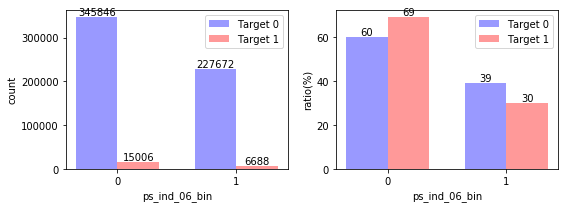

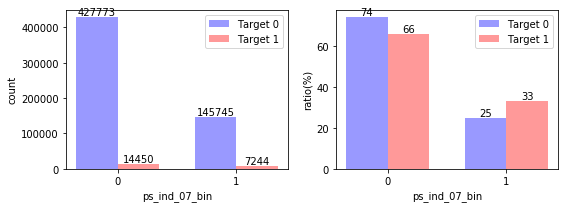

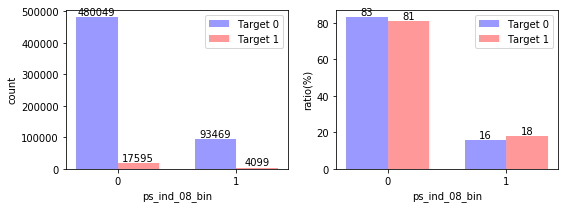

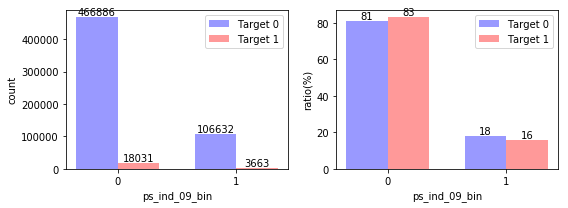

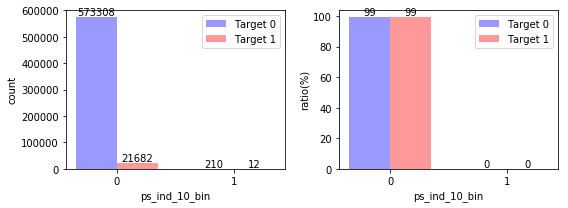

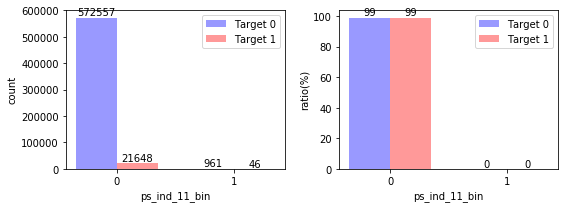

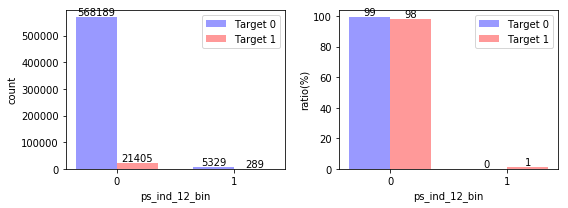

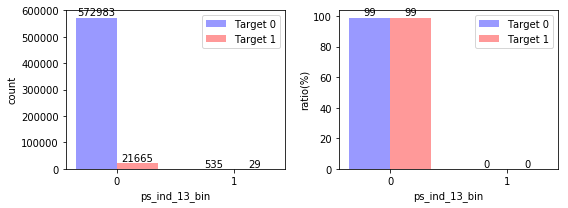

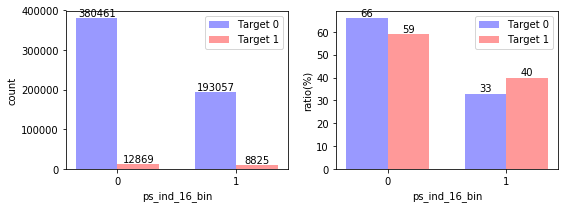

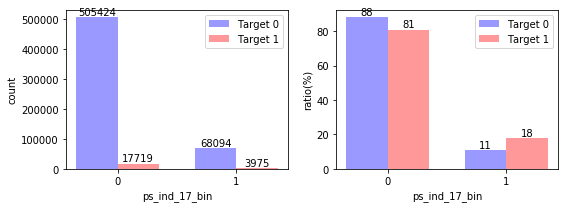

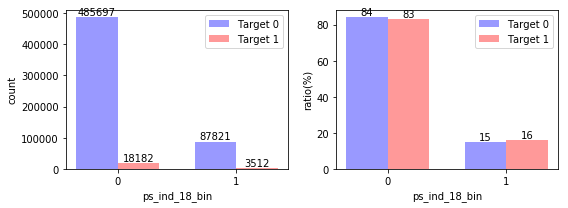

In [12]:
for col in ind_list[2]:
    bar_plot(train_df, col)

#### 1-2) ps_ind - category 

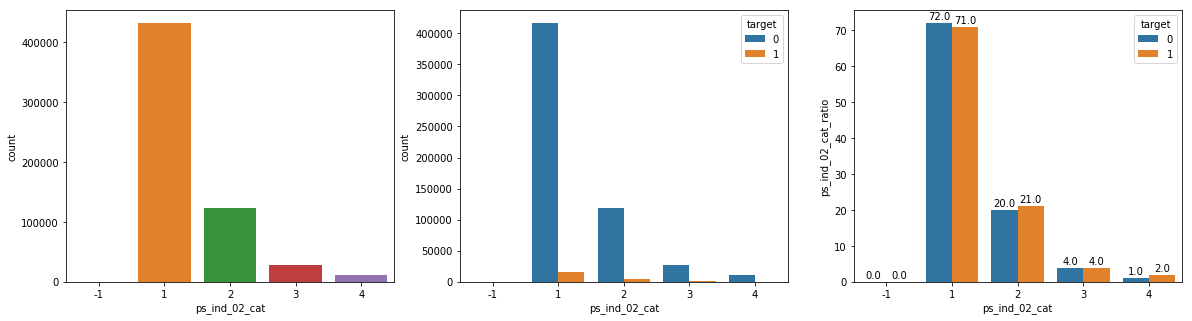

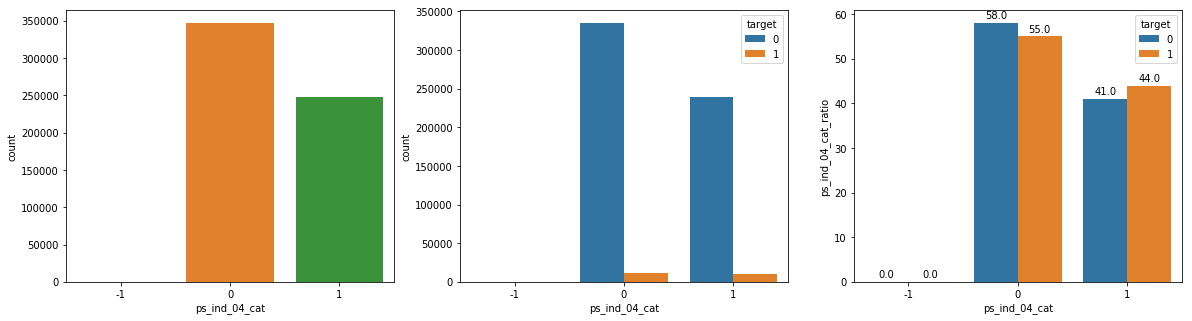

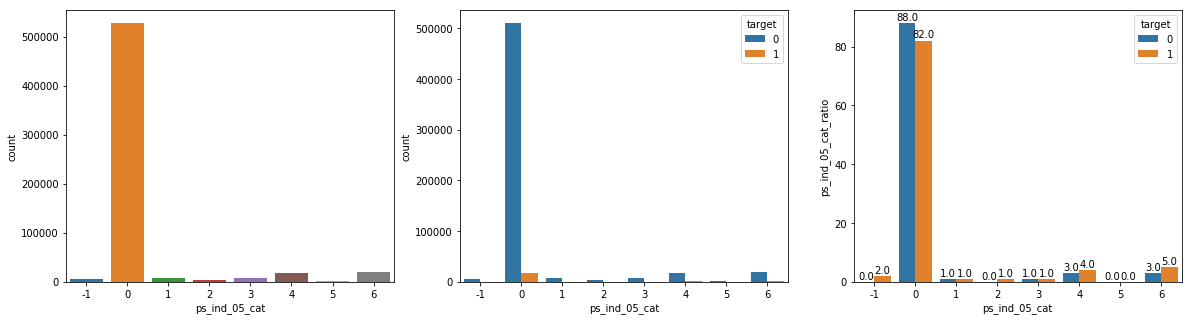

In [104]:
for col in ind_list[1]:
    cat_plot(train_df, col)

#### 1-3) ps_ind - etc. 

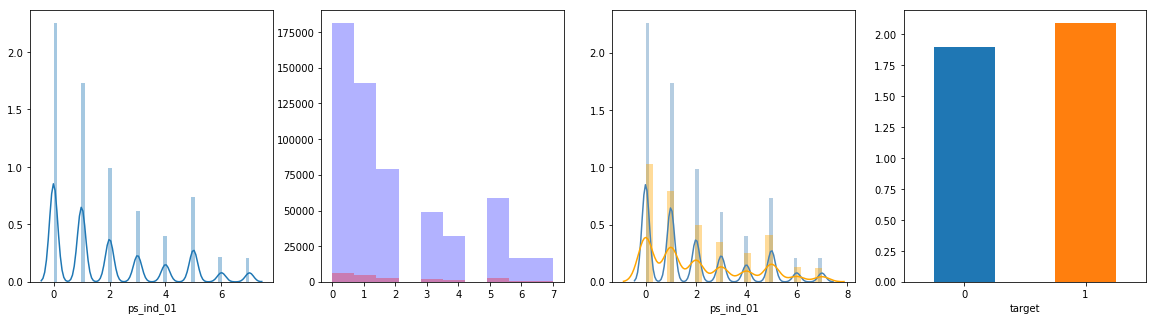

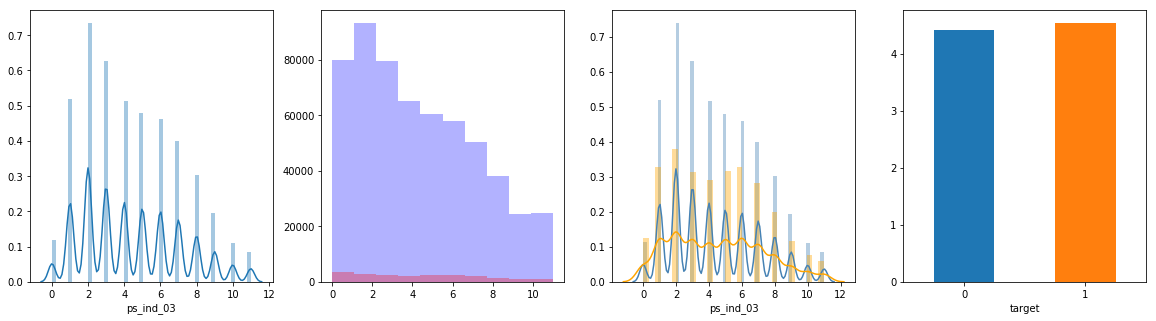

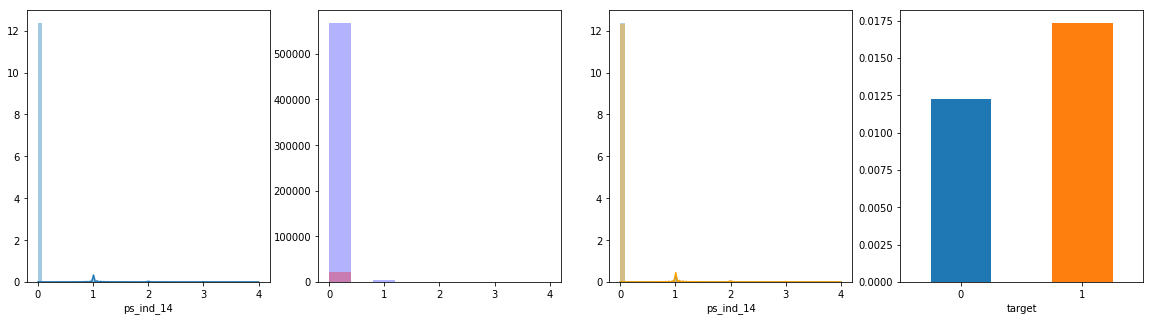

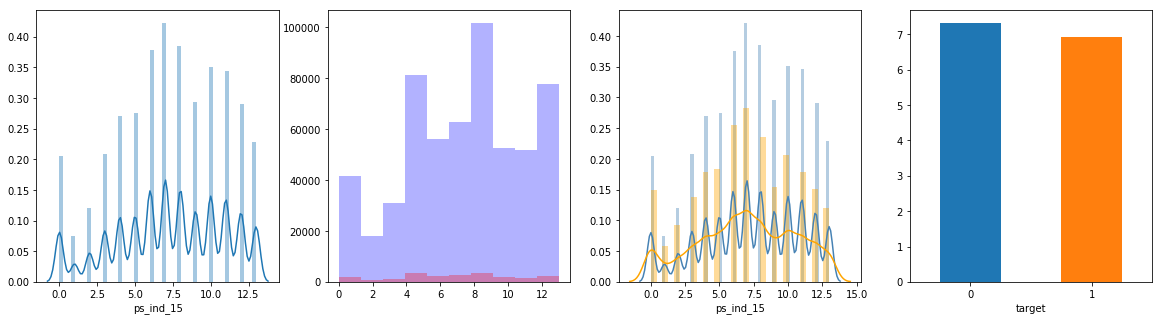

In [109]:
a = set(ind_list[0]).difference(set(ind_list[1])).difference(set(ind_list[2]))
temp_list = list(a)
temp_list.sort()

for col in temp_list:
    con_plot(train_df, col)

### 2) EDA for ps_reg columns 

#### 2-1) ps_reg - binary

In [17]:
for col in reg_list[2]:
    bar_plot(train_df, col)

#### 2-2) ps_reg - category 

In [16]:
for col in reg_list[1]:
    cat_plot(train_df, col)

#### 2-3) ps_reg - continous

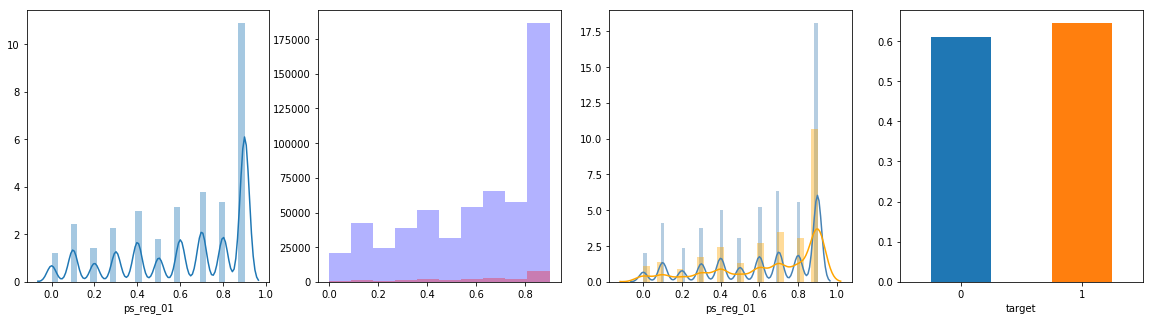

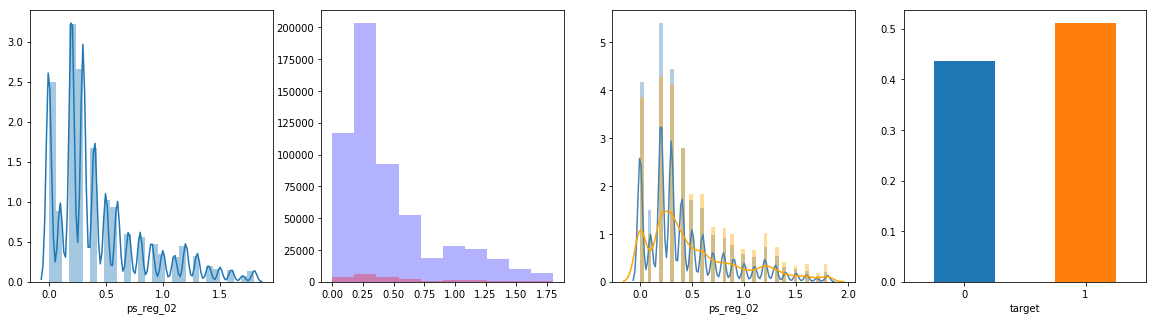

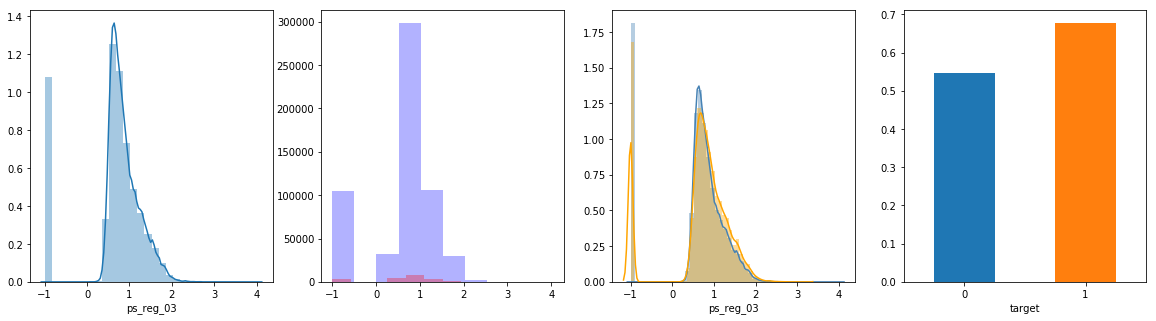

In [100]:
a = set(reg_list[0]).difference(set(reg_list[1])).difference(set(reg_list[2]))
temp_list = list(a)
temp_list.sort()

for col in temp_list:
    con_plot(train_df, col)

### 3) EDA for ps_car columns 

#### 3-1) ps_car - binary

In [18]:
for col in car_list[2]:
    bar_plot(train_df, col)

#### 3-2) ps_car - category 

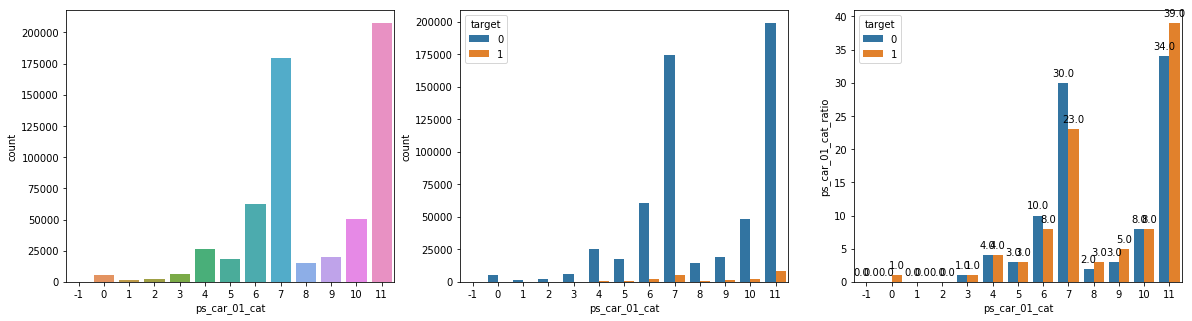

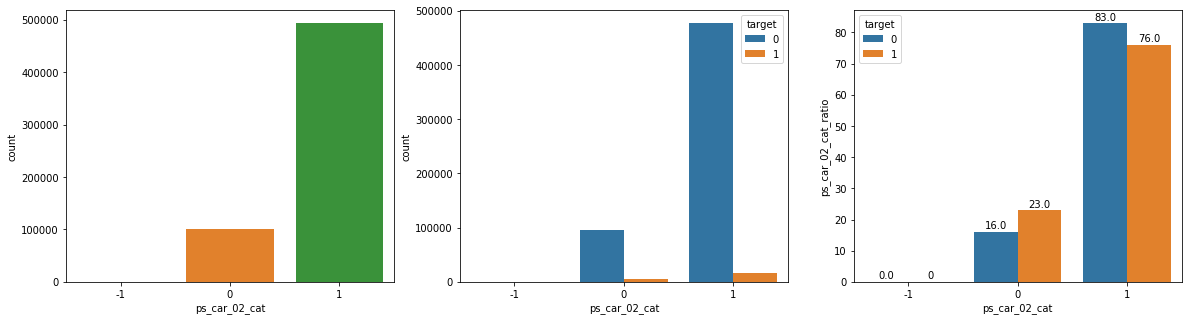

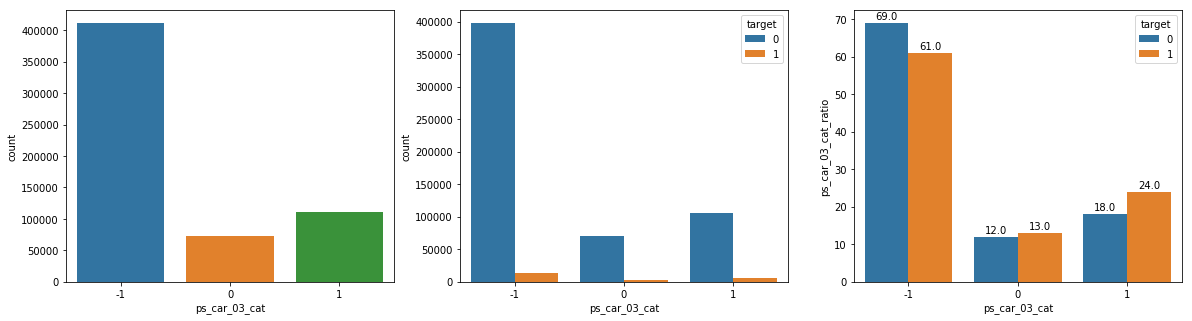

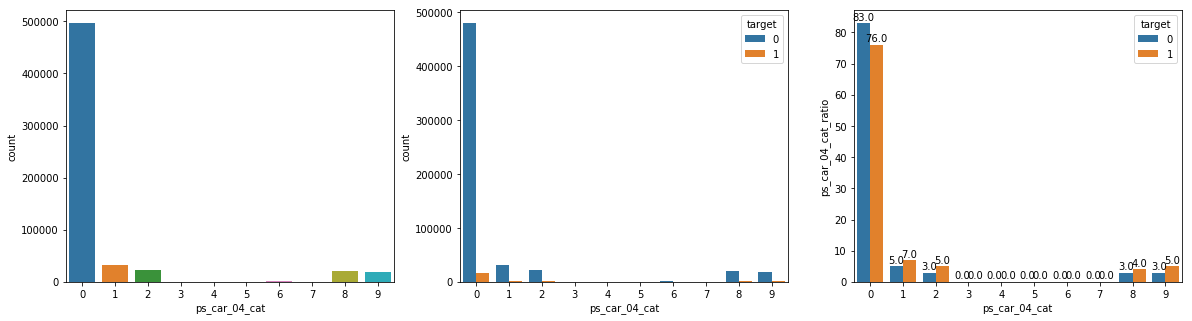

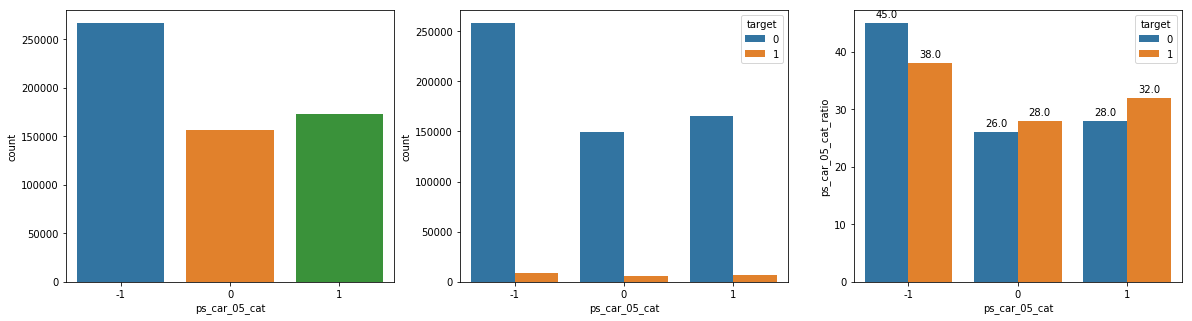

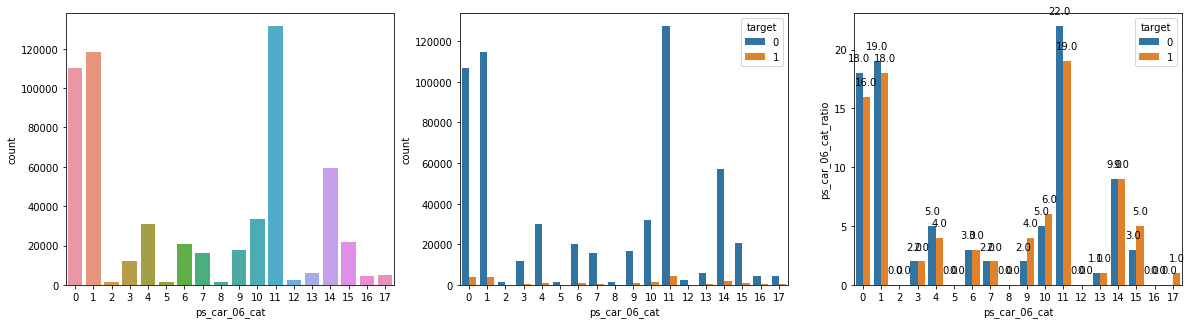

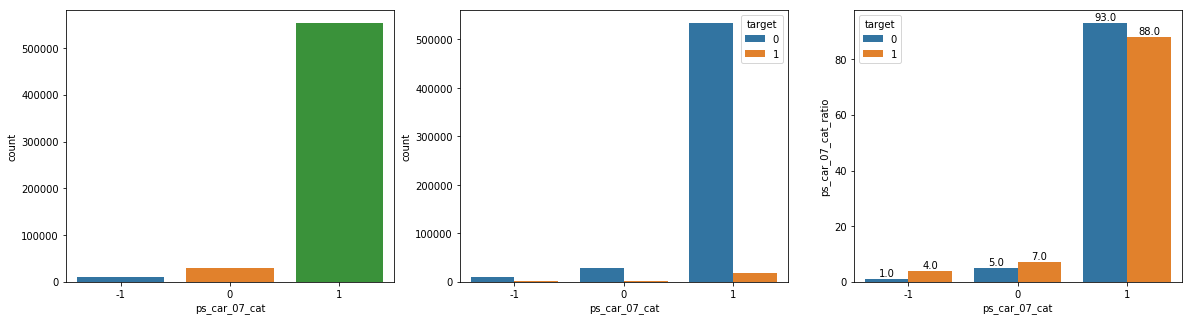

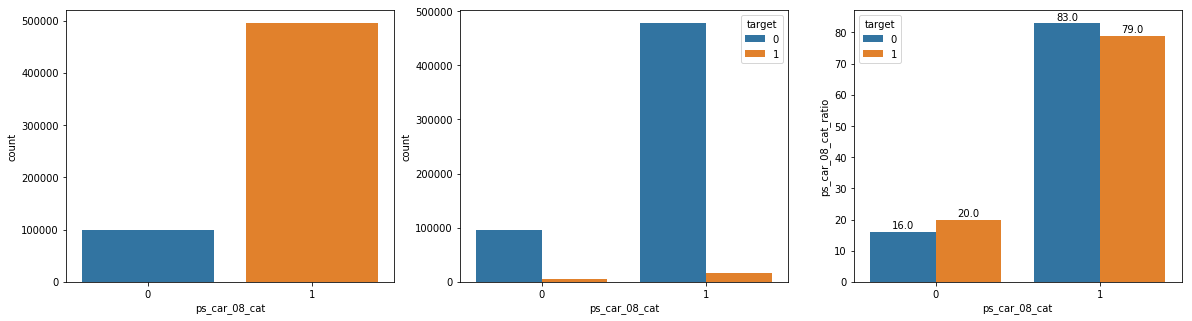

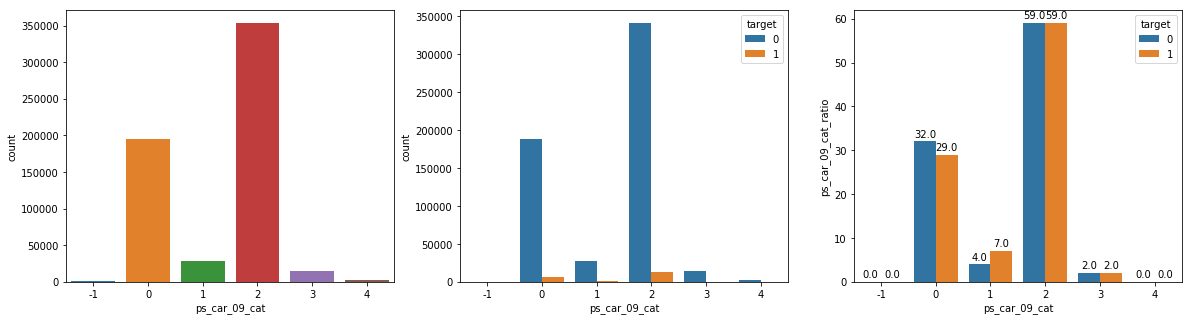

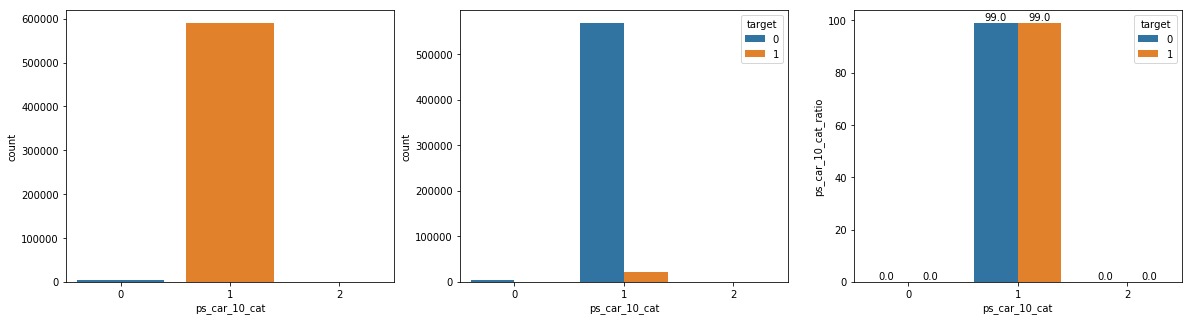

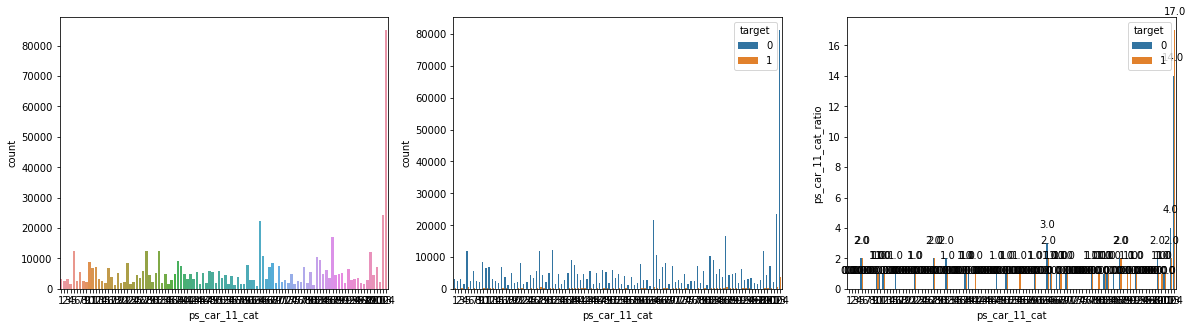

In [98]:
for col in car_list[1]:
    cat_plot(train_df, col)

#### 3-3) ps_car

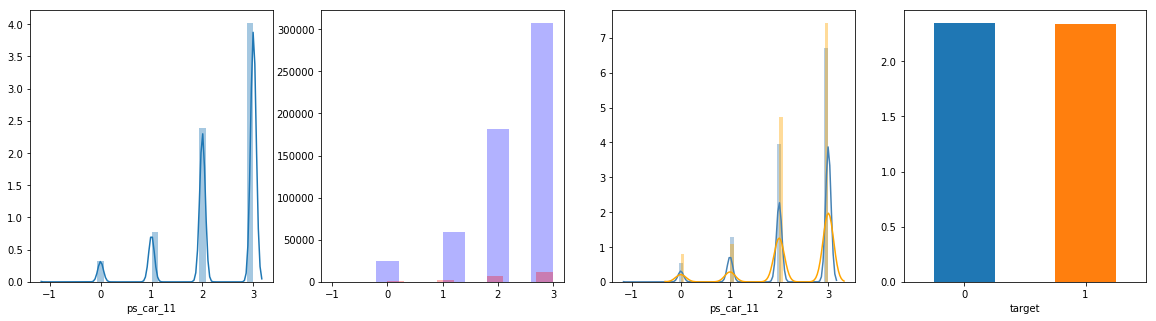

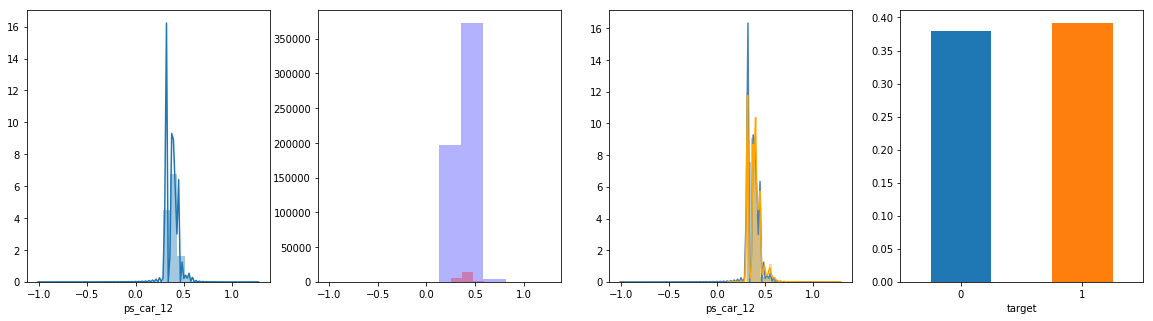

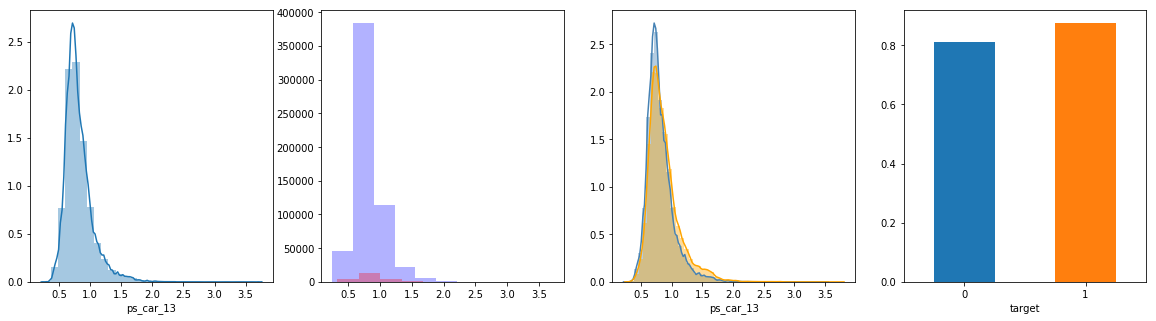

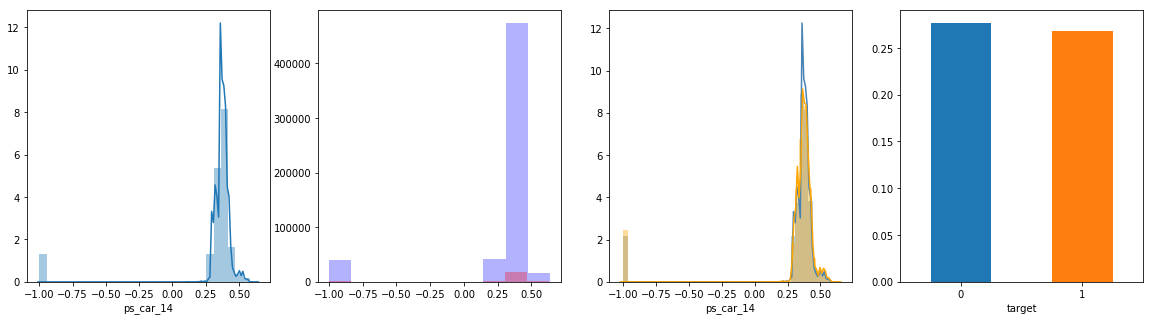

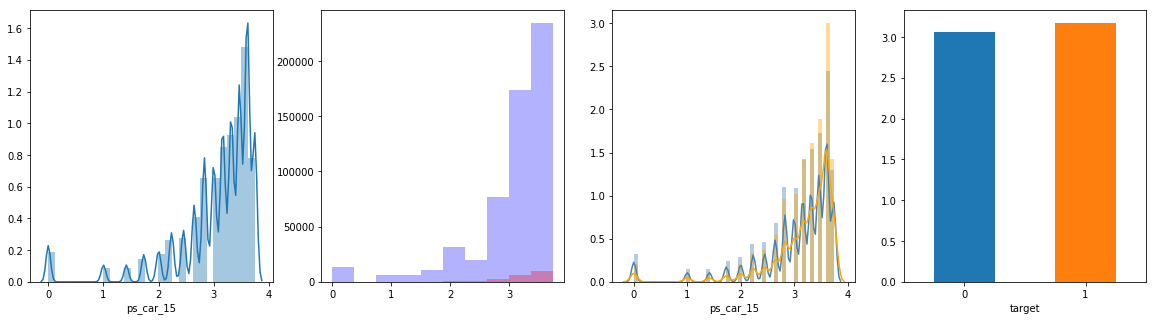

In [22]:
a = set(car_list[0]).difference(set(car_list[1])).difference(set(car_list[2]))
temp_list = list(a)
temp_list.sort()

for col in temp_list:
    con_plot(train_df, col)

### 4) EDA for ps_calc columns 

#### 4-1) ps_calc - binary

- Target0/Target1 분포 차이가 없으므로 의미없는 Feature로 판단 (Feature 삭제)

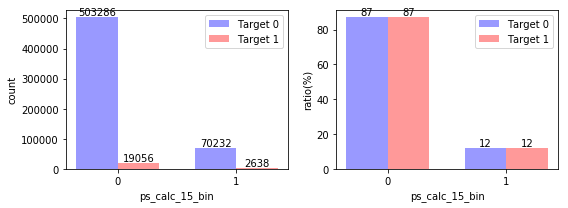

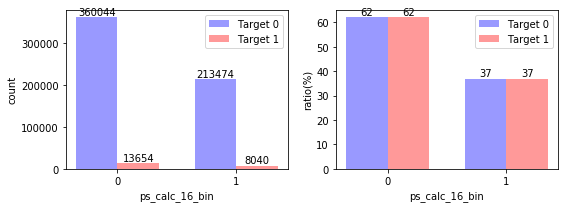

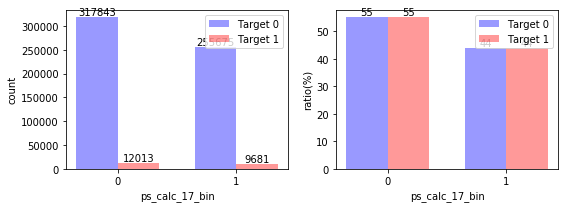

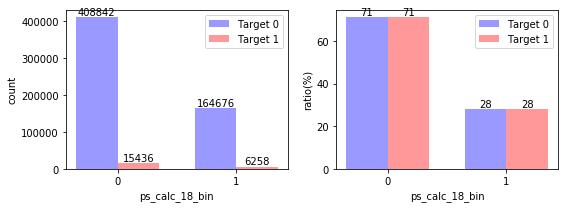

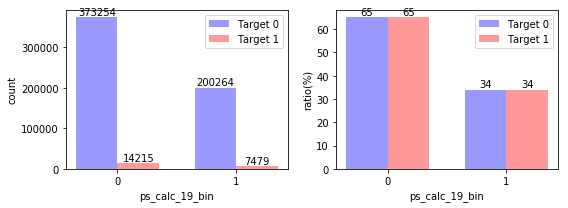

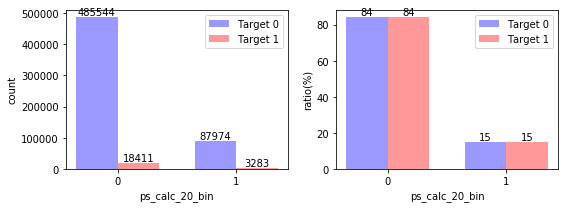

In [21]:
for col in calc_list[2]:
    bar_plot(train_df, col)

#### 4-2) ps_calc - category 

In [20]:
for col in calc_list[1]:
    cat_plot(train_df, col)

#### 4-3) ps_calc

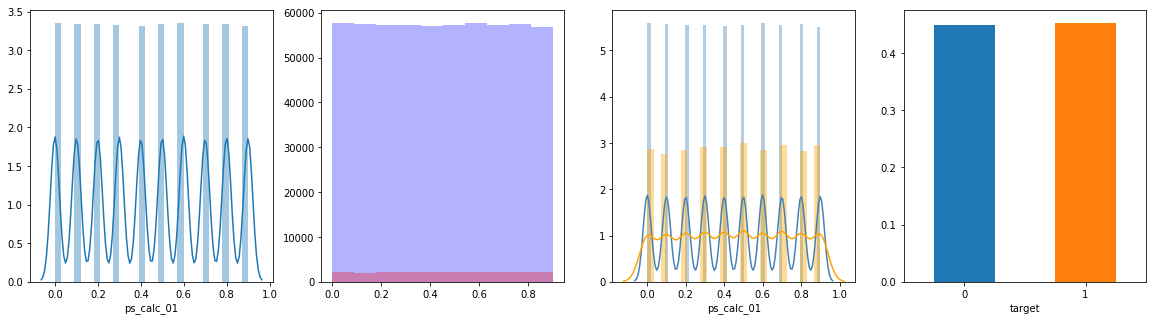

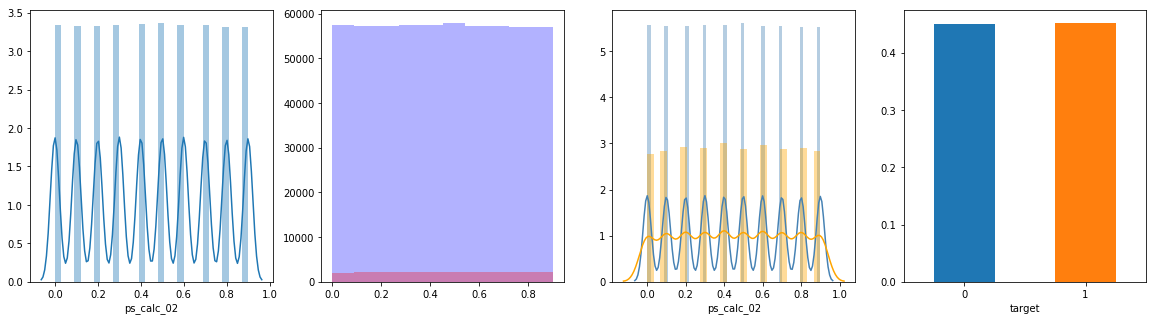

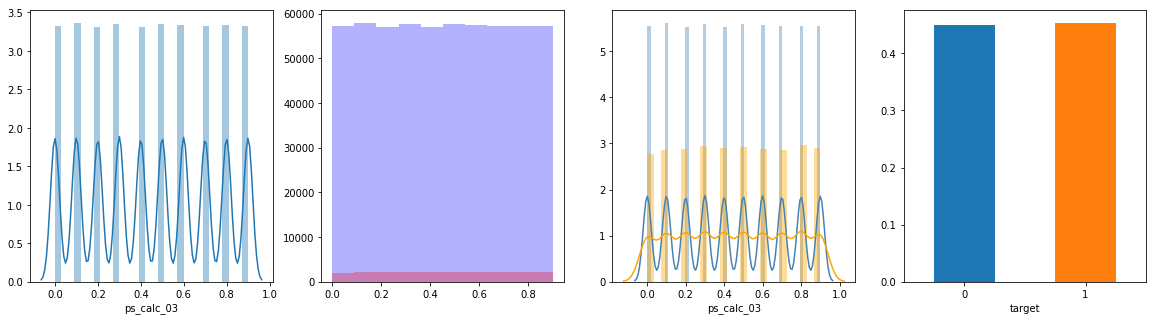

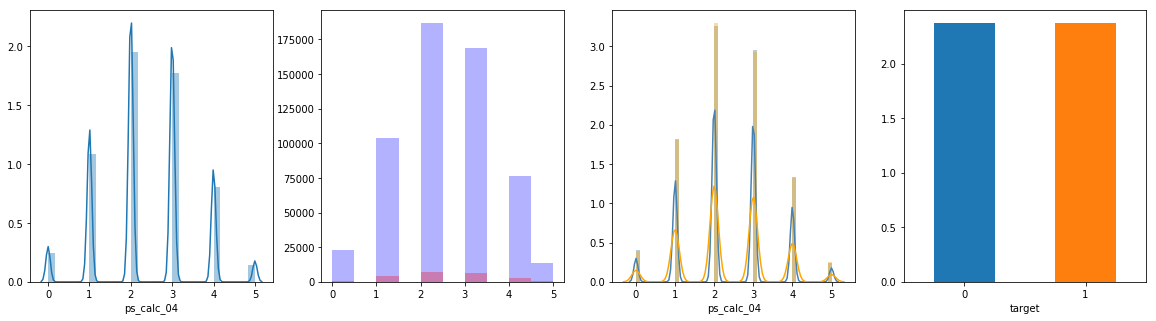

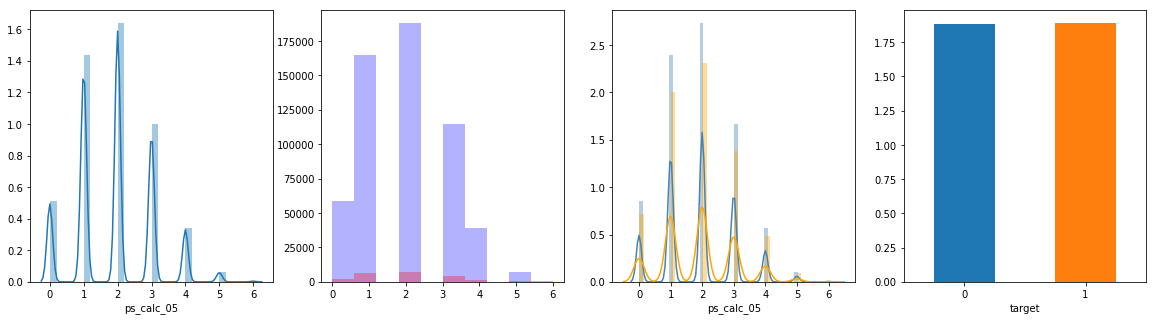

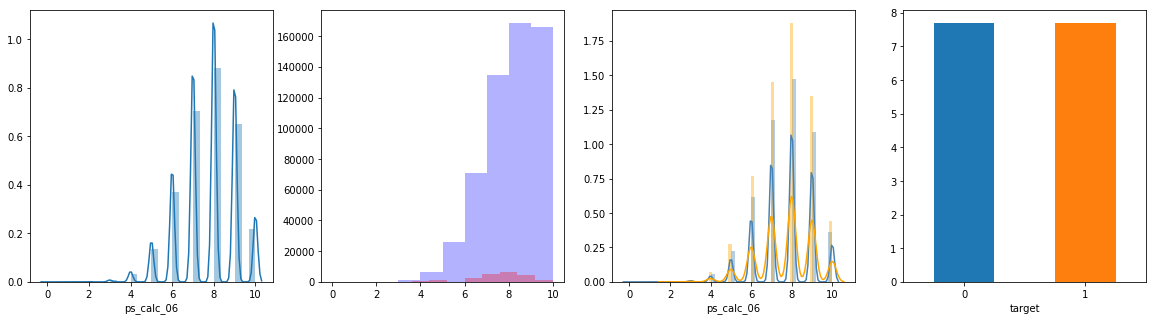

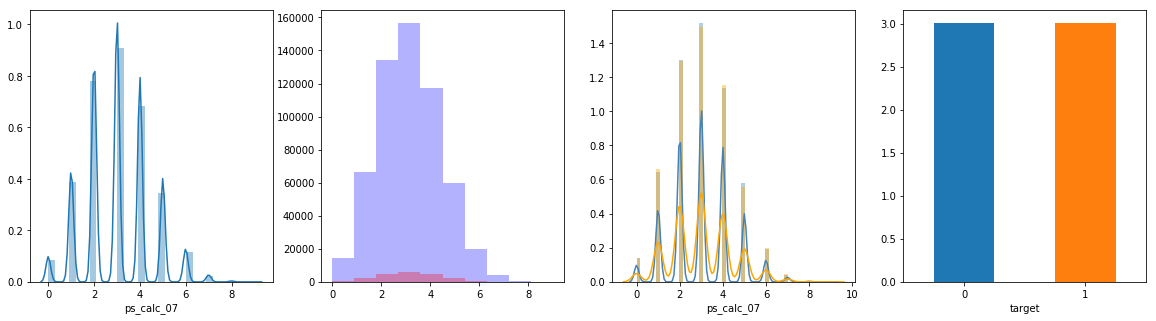

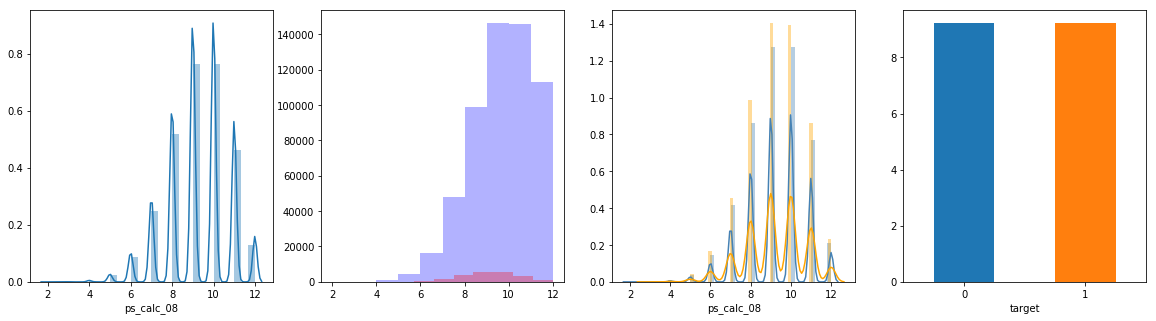

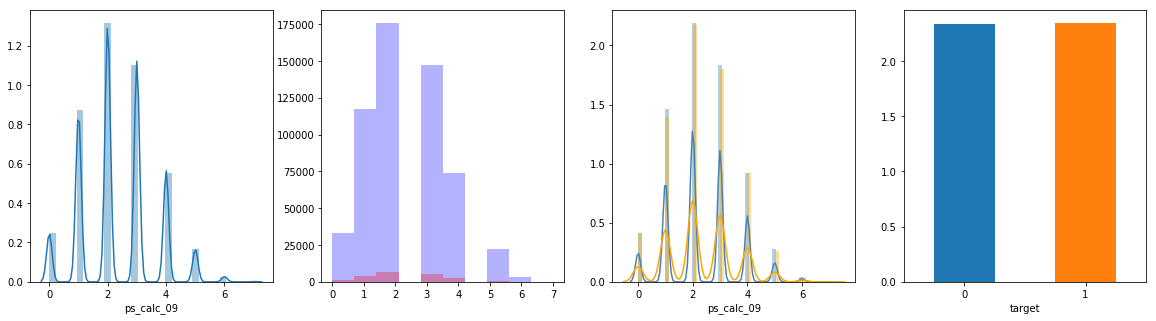

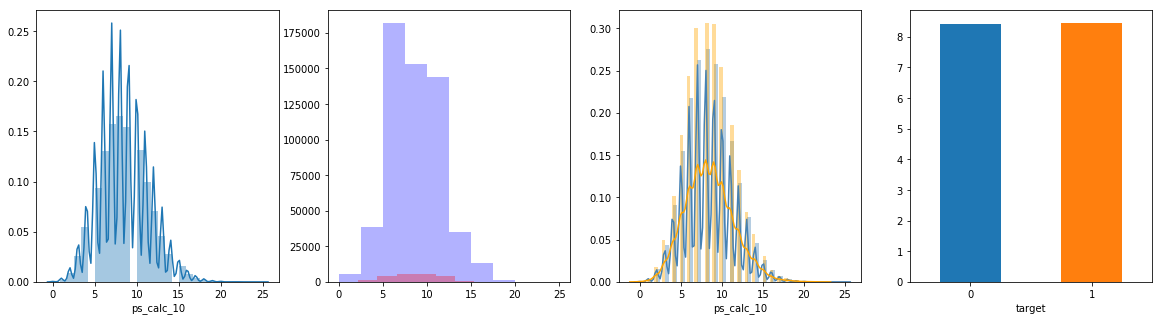

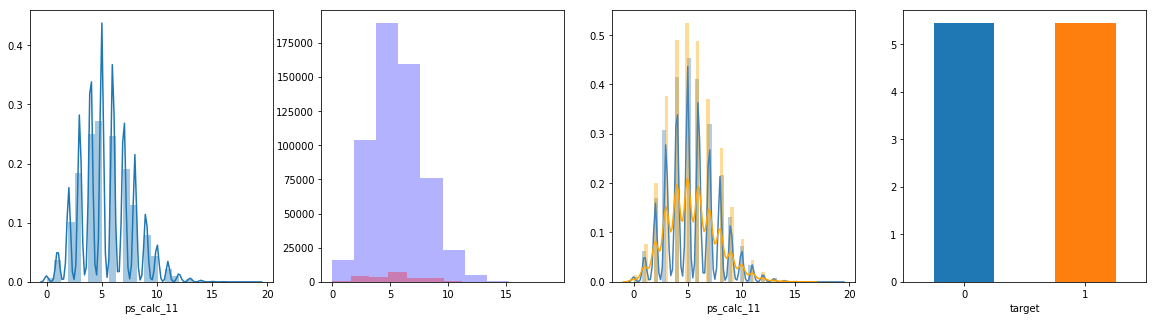

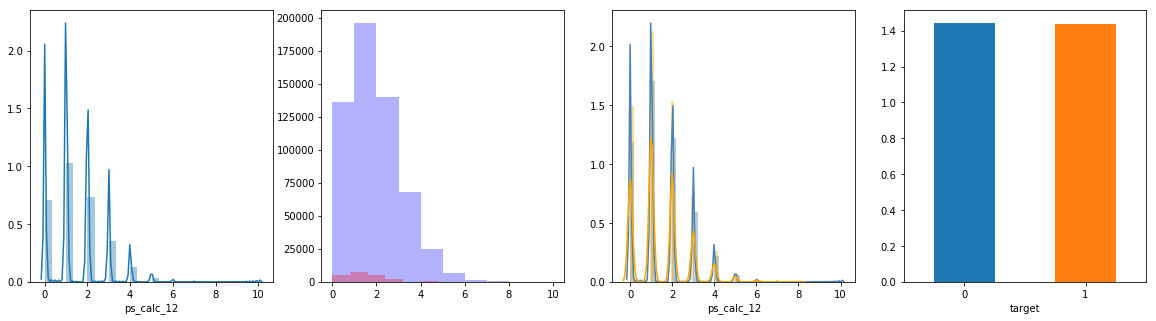

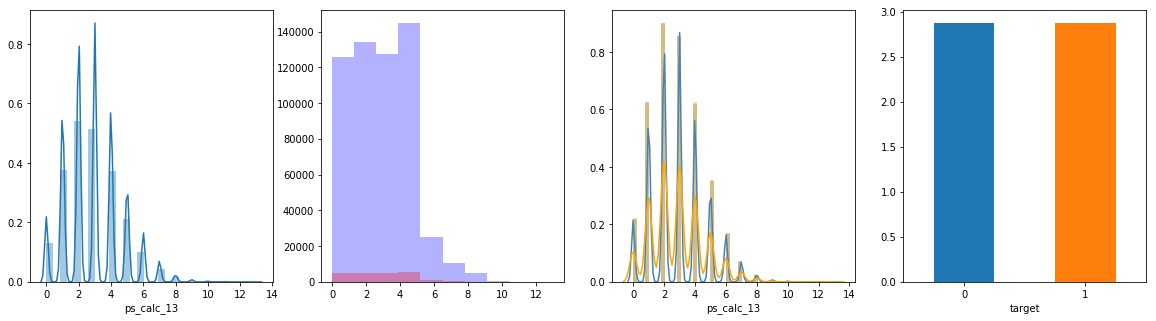

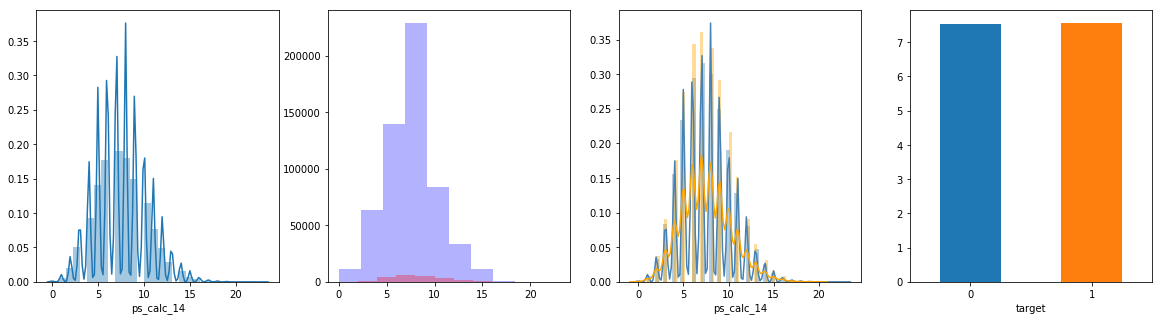

In [19]:
a = set(calc_list[0]).difference(set(calc_list[1])).difference(set(calc_list[2]))
temp_list = list(a)
temp_list.sort()

for col in temp_list:
    con_plot(train_df, col)

## 2-3. Correlation with columns

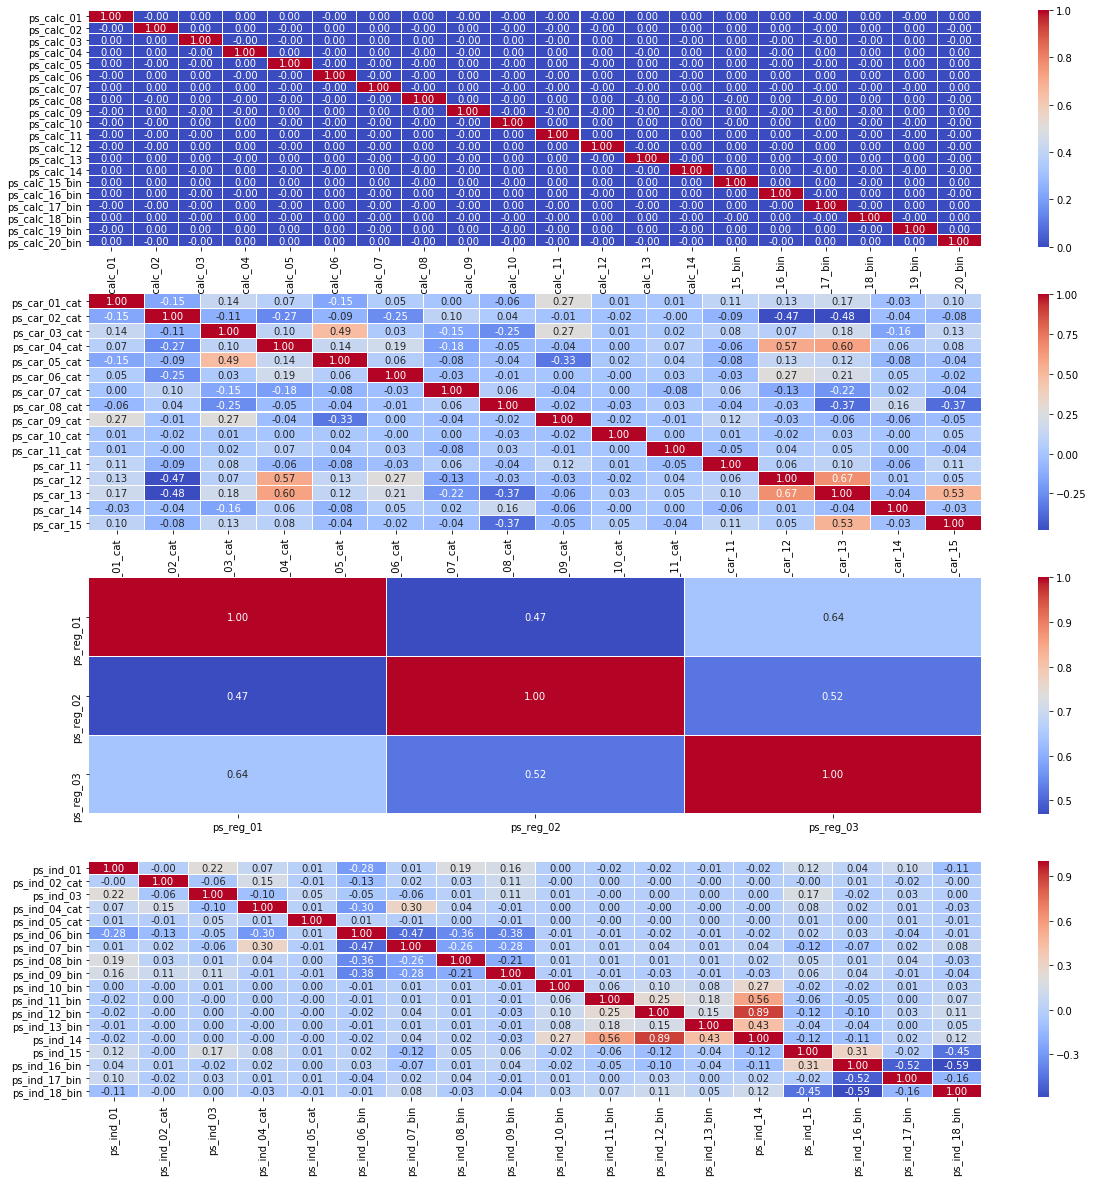

In [25]:
fig, ax = plt.subplots(4, 1, figsize=(20,20))

sns.heatmap(round(train_df[calc_list[0]].corr(),2), annot=True, ax=ax[0], cmap="coolwarm", fmt='.2f', linewidths=.05)
sns.heatmap(round(train_df[car_list[0]].corr(),2), annot=True, ax=ax[1], cmap="coolwarm", fmt='.2f', linewidths=.05)
sns.heatmap(round(train_df[reg_list[0]].corr(),2), annot=True, ax=ax[2], cmap="coolwarm", fmt='.2f', linewidths=.05)
sns.heatmap(round(train_df[ind_list[0]].corr(),2), annot=True, ax=ax[3], cmap="coolwarm", fmt='.2f', linewidths=.05)

## 2-3. EDA for Column - Target (Label)  


## 3. Feature Engineering 

In [ ]:
feature = []

## 4. Modeling 

In [29]:
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [31]:
train_y = train_df['target']
train_X = train_df.drop(columns='target', axis=1)
test_X = test_df

In [32]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y)
print(X_train.shape)
print(X_val.shape)

(446409, 58)
(148803, 58)


In [73]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
param = {'max_depth': 5, 'eta': 0.1, 'objective': 'reg:linear'}
param['nthread'] = 4

param['eval_metric'] = 'auc'

num_round = 50
xgb = xgboost.train(param, dtrain, num_round)

[00:51:55] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:51:56] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:51:56] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:51:57] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:51:58] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:51:59] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:52:00] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 prun

In [74]:
def gini(actual, pred, cmpcol=0, sortcol=1):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [75]:
y_pred = xgb.predict(dtrain)
print(gini_normalized(y_train, y_pred))

0.3190614955290354


In [71]:
dval = xgboost.DMatrix(X_val, label=y_val)

y_pred = xgb.predict(dval)
print(gini_normalized(y_val, y_pred))

0.26584730479393043


## 5. Test Result 

In [ ]:
dtrain = xgboost.DMatrix(train_X, label=train_y)
param = {'max_depth': 5, 'eta': 0.1, 'objective': 'reg:linear'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

num_round = 50
xgb = xgboost.train(param, dtrain, num_round)

In [77]:
dtest = xgboost.DMatrix(test_X)
y_pred = xgb.predict(dtest)

In [78]:
pd.DataFrame({'target':y_pred, 'id': test_df['id']}).to_csv('../dataset/submission.csv', index=False)